<a href="https://colab.research.google.com/github/didi-d92/E.D.A.-and-Data-Visualizations-with-Python-/blob/main/Womart_project_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install proplot


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import proplot as pplt
from scipy import stats
import matplotlib.ticker as ticker
from sklearn.preprocessing import MinMaxScaler
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

#Dowloading data

In [6]:
Data = pd.read_csv('/content/TRAIN.csv', low_memory=False)

In [7]:
Data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [9]:
Data.describe()

,Store_id,Holiday,#Order,Sales
count,188340.000000,188340.000000,188340.000000,188340.000000
mean,183.000000,0.131783,68.205692,42784.327982
std,105.366308,0.338256,30.467415,18456.708302
min,1.000000,0.000000,0.000000,0.000000
25%,92.000000,0.000000,48.000000,30426.000000
50%,183.000000,0.000000,63.000000,39678.000000
75%,274.000000,0.000000,82.000000,51909.000000
max,365.000000,1.000000,371.000000,247215.000000


In [10]:
Data.isna().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0
#Order,0
Sales,0


In [11]:
Data.isnull().sum()

,0
ID,0
Store_id,0
Store_Type,0
Location_Type,0
Region_Code,0
Date,0
Holiday,0
Discount,0
#Order,0
Sales,0


In [12]:
print(Data.duplicated().sum())

0


In [13]:
print('Number of duplicates:', len(Data[Data.duplicated()]))

Number of duplicates: 0


#DATA PREPROCESSING

In [14]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


Discount

In [15]:
Data['Discount'] = Data['Discount'].map({'Yes':1 , 'No': 0})

Cuando los agrupe por fecha los voy a volver a analizar

In [16]:
Data['Discount'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 188340 entries, 0 to 188339
Series name: Discount
Non-Null Count   Dtype
--------------   -----
188340 non-null  int64
dtypes: int64(1)
memory usage: 1.4 MB


Date

In [17]:
Data['Date'] = pd.to_datetime(Data['Date'])

In [18]:
Data['Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 188340 entries, 0 to 188339
Series name: Date
Non-Null Count   Dtype         
--------------   -----         
188340 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.4 MB


#EDA

Best stores by Total Sales

In [19]:
best_stores = Data.groupby(['Store_id'], as_index=False)['Sales'].sum()
best_stores = best_stores.sort_values('Sales', ascending = False)
best_stores = best_stores.head(20)
best_stores['Store_id'] = best_stores['Store_id'].astype(str)

In [20]:
best_stores.head()

,Store_id,Sales
174,175,52560255.15
336,337,49342417.92
125,126,46351830.51
311,312,44890318.23
145,146,43697690.67


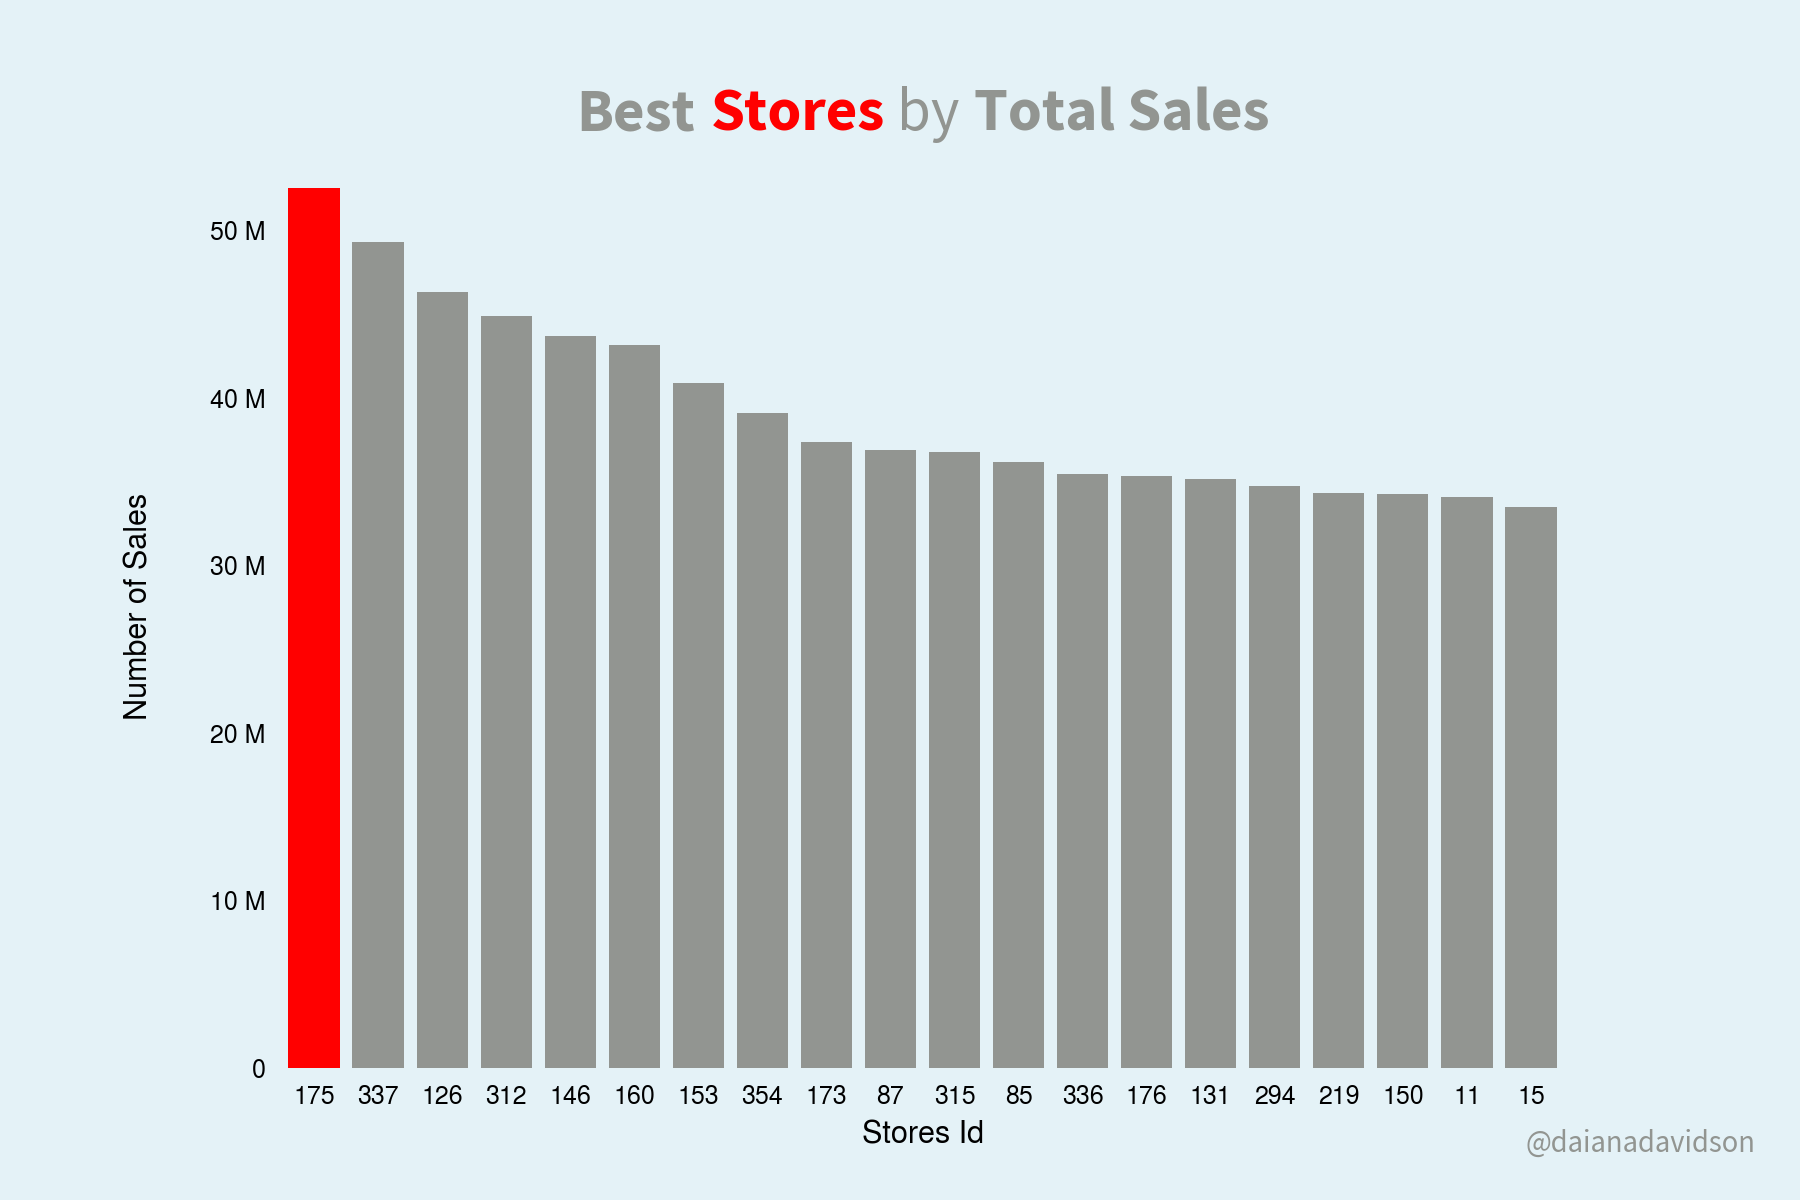

In [21]:
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')
col1 = best_stores.head(1)
col2 = best_stores.tail(19)
ax.bar(col1.Store_id, col1.Sales, color = 'red')
ax.bar(col2.Store_id, col2.Sales, color = 'grey')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)
plt.grid(b=None)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.spines['left'].set_position(('data', -0.5))
mpl.rcParams['font.family'] = 'Source Sans Pro'
plt.xlabel('Stores Id', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)
plt.text(4.1, 56000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(6.2, 56000000, "Stores", size=22, color="red", fontweight="bold")
plt.text(9.1, 56000000, "by", size=22, color="grey")
plt.text(10.3, 56000000,"Total Sales", size=22, color="grey", fontweight="bold")
plt.text(22.5, -5000000, "@daianadavidson", fontsize=11, ha="right", color='grey');




Best store types

In [22]:
best_store_type = Data.groupby(['Store_Type'], as_index=False)['Sales'].sum()
best_store_type = best_store_type.sort_values('Sales', ascending = False)
best_store_type['Store_Type'] = best_store_type['Store_Type'].astype(str)

In [23]:
best_store_type.head()

,Store_Type,Sales
0,S1,3.343866e+09
3,S4,2.752946e+09
2,S3,1.165658e+09
1,S2,7.955308e+08


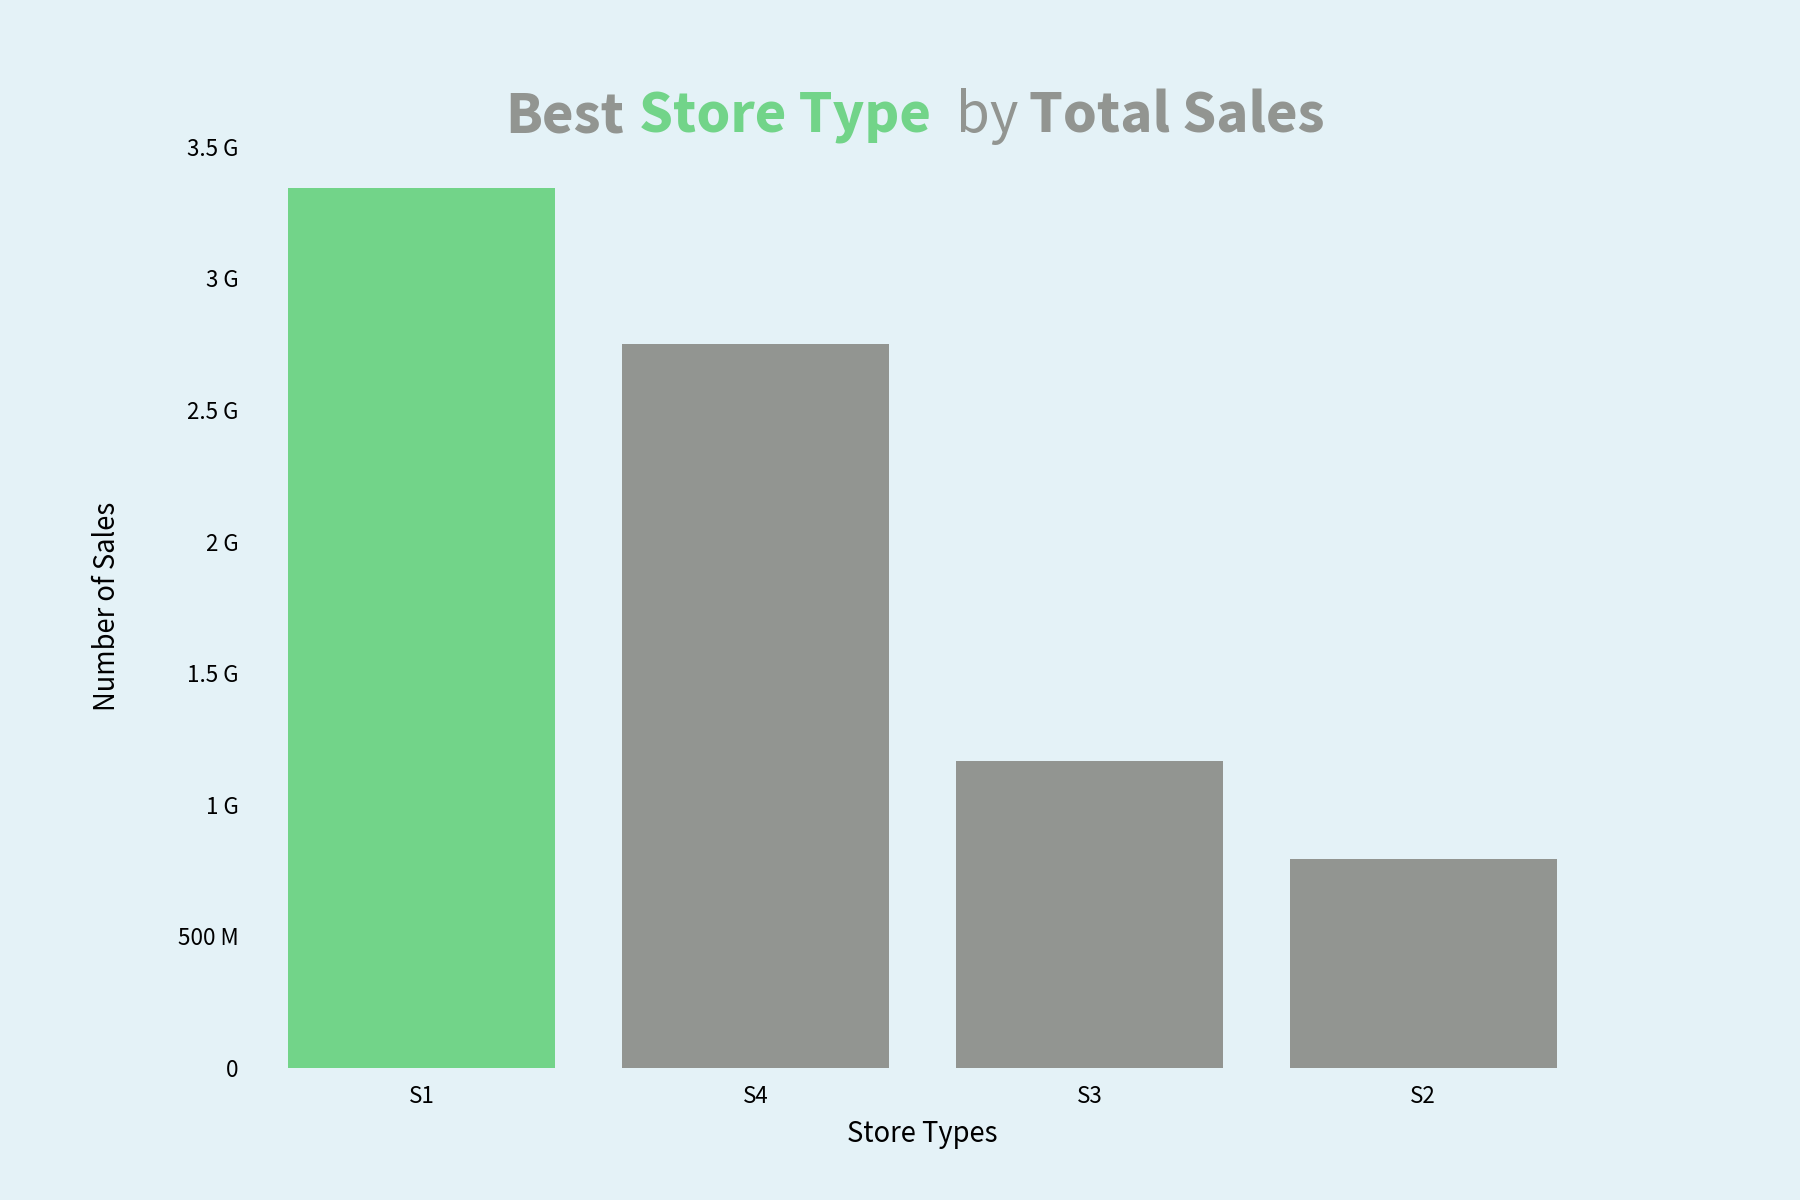

In [24]:
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')
col1 = best_store_type.head(1)
col2 = best_store_type.tail(3)
ax.bar(col1.Store_Type, col1.Sales, color = '#72d489')
ax.bar(col2.Store_Type, col2.Sales, color = 'grey')
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)
plt.grid(b=None)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.spines['left'].set_position(('data', -0.5))
mpl.rcParams['font.family'] = 'Source Sans Pro'
plt.xlabel('Store Types', fontsize=11)
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)
plt.text(0.25, 3555000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(0.65, 3555000000, "Store Type", size=22, color="#72d489", fontweight="bold")
plt.text(1.6, 3555000000, "by", size=22, color="grey")
plt.text(1.82, 3555000000,"Total Sales", size=22, color="grey", fontweight="bold")
plt.text(22.5, -5000000, "@daianadavidson", fontsize=11, ha="right", color='grey');

Best month by sales

In [25]:
best_month = Data.copy()
best_month['Month'] = best_month['Date'].apply(lambda x: x.strftime('%b-%Y'))
best_month = best_month.groupby(['Month'], as_index=False)['Sales'].sum()

In [26]:
best_month.head()

,Month,Sales
0,Apr-2018,4.525465e+08
1,Apr-2019,4.403971e+08
2,Aug-2018,4.528305e+08
3,Dec-2018,5.258885e+08
4,Feb-2018,4.175890e+08


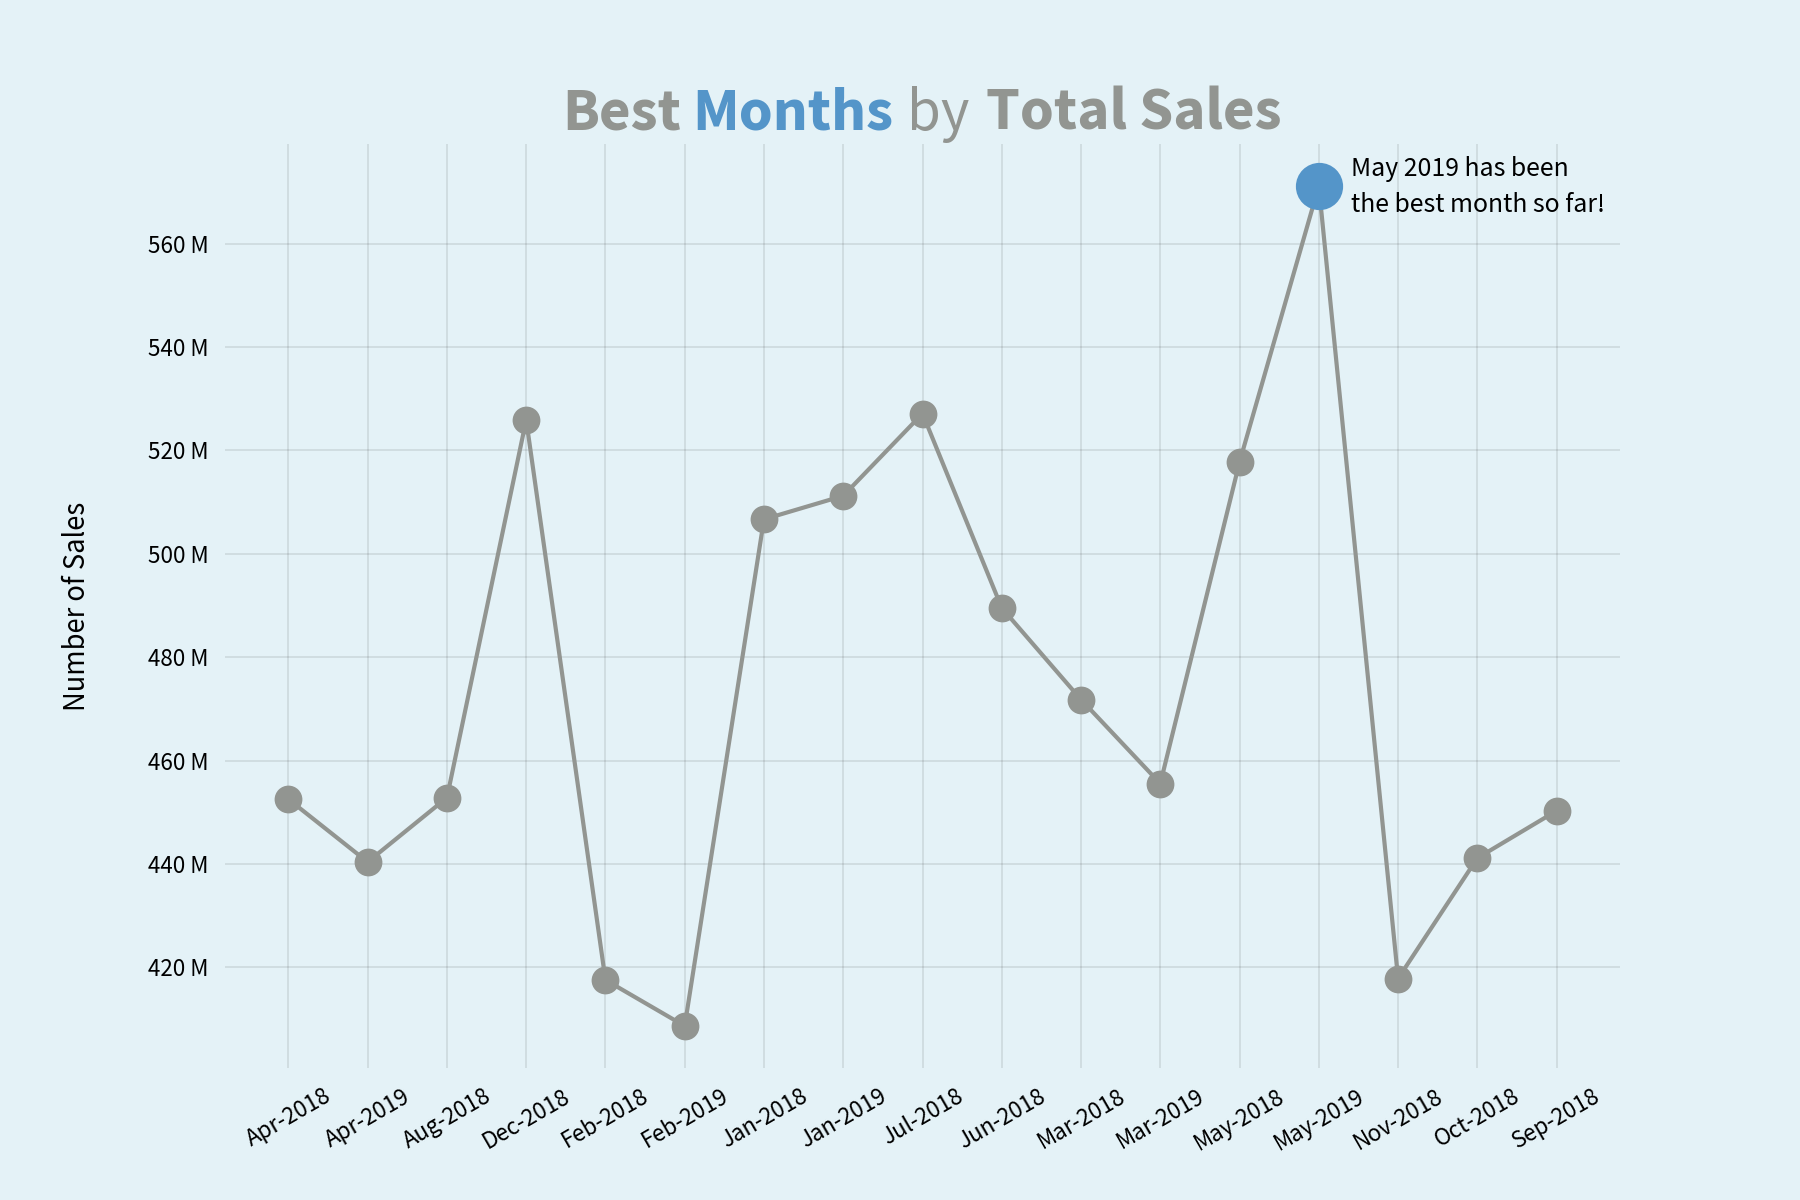

In [27]:
fig, ax = plt.subplots(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
ax.patch.set_facecolor('#e4f2f7')
best_month_1 = best_month.sort_values('Sales', ascending = False).head(1)
ax.plot(best_month['Month'].values, best_month['Sales'].values, marker='o', markerfacecolor='grey', color='gray', markersize=9)
ax.plot(best_month_1['Month'].values, best_month_1['Sales'].values, marker='o', markerfacecolor='#5495c9', color='#5495c9', markersize=16)
plt.xticks(rotation=30)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
for i in ['top', 'bottom', 'left', 'right']:
    ax.spines[i].set_visible(False)
ax.yaxis.set_major_formatter(ticker.EngFormatter())
mpl.rcParams['font.family'] = 'Source Sans Pro'
plt.ylabel('Number of Sales', fontsize=11, labelpad=20)
plt.text(13.4, 573000000, "May 2019 has been", size=10)
plt.text(13.4, 566000000, "the best month so far!", size=10)
plt.text(3.45, 582000000, "Best", size=22, color="grey", fontweight="bold")
plt.text(5.1, 582000000, "Months", size=22, color="#5495c9", fontweight="bold")
plt.text(7.8, 582000000, "by", size=22, color="grey")
plt.text(8.8, 582000000,"Total Sales", size=22, color="grey", fontweight="bold")
plt.text(38, 43000, "@daianadavidson", fontsize=11, ha="right", color='grey');


Holidays and Sales

In [28]:
holiday = Data.groupby(['Holiday'], as_index=False)['Sales'].sum()
holiday['Holiday'] = holiday['Holiday'].astype(str)

In [29]:
holiday.head()

,Holiday,Sales
0,0,7.178085e+09
1,1,8.799156e+08


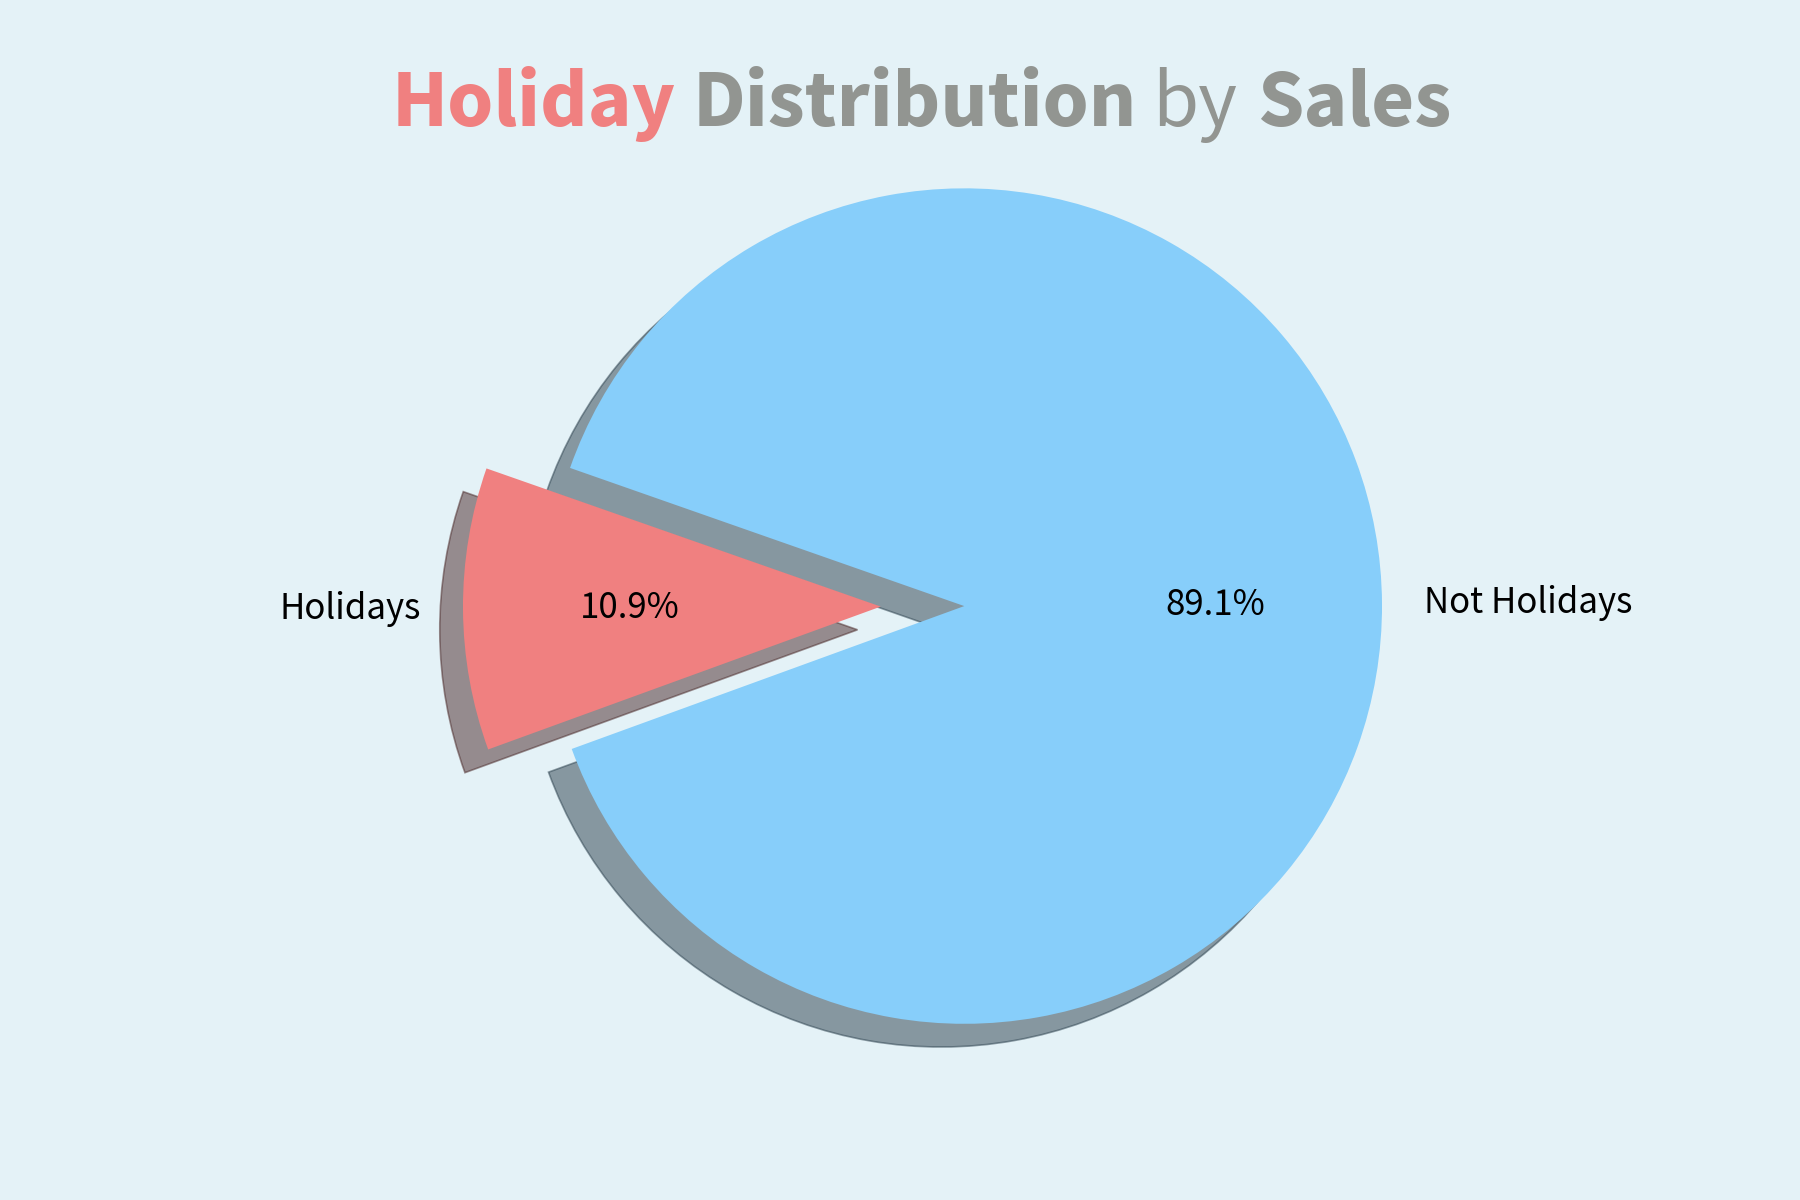

In [30]:
fig = plt.figure(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'Source Sans Pro'
plt.pie(holiday['Sales'],
        explode=(0.2, 0),
        labels=['Not Holidays', 'Holidays'],
        colors= ['lightskyblue', 'lightcoral'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=200)

plt.axis('equal')
plt.text(-1.17, 1.15, "Holiday", size=30, color="lightcoral", fontweight="bold")
plt.text(-0.45, 1.15, "Distribution", size=30, color="grey", fontweight="bold")
plt.text(0.65, 1.15, "by", size=30, color="grey")
plt.text(0.9, 1.15, "Sales", size=30, color="grey", fontweight="bold")

plt.show()

Discounts and sales

In [31]:
discount = Data.groupby(['Discount'], as_index=False)['Sales'].sum()
discount['Discount'] = discount['Discount'].astype(str)
discount.head()

,Discount,Sales
0,0,3.891890e+09
1,1,4.166110e+09


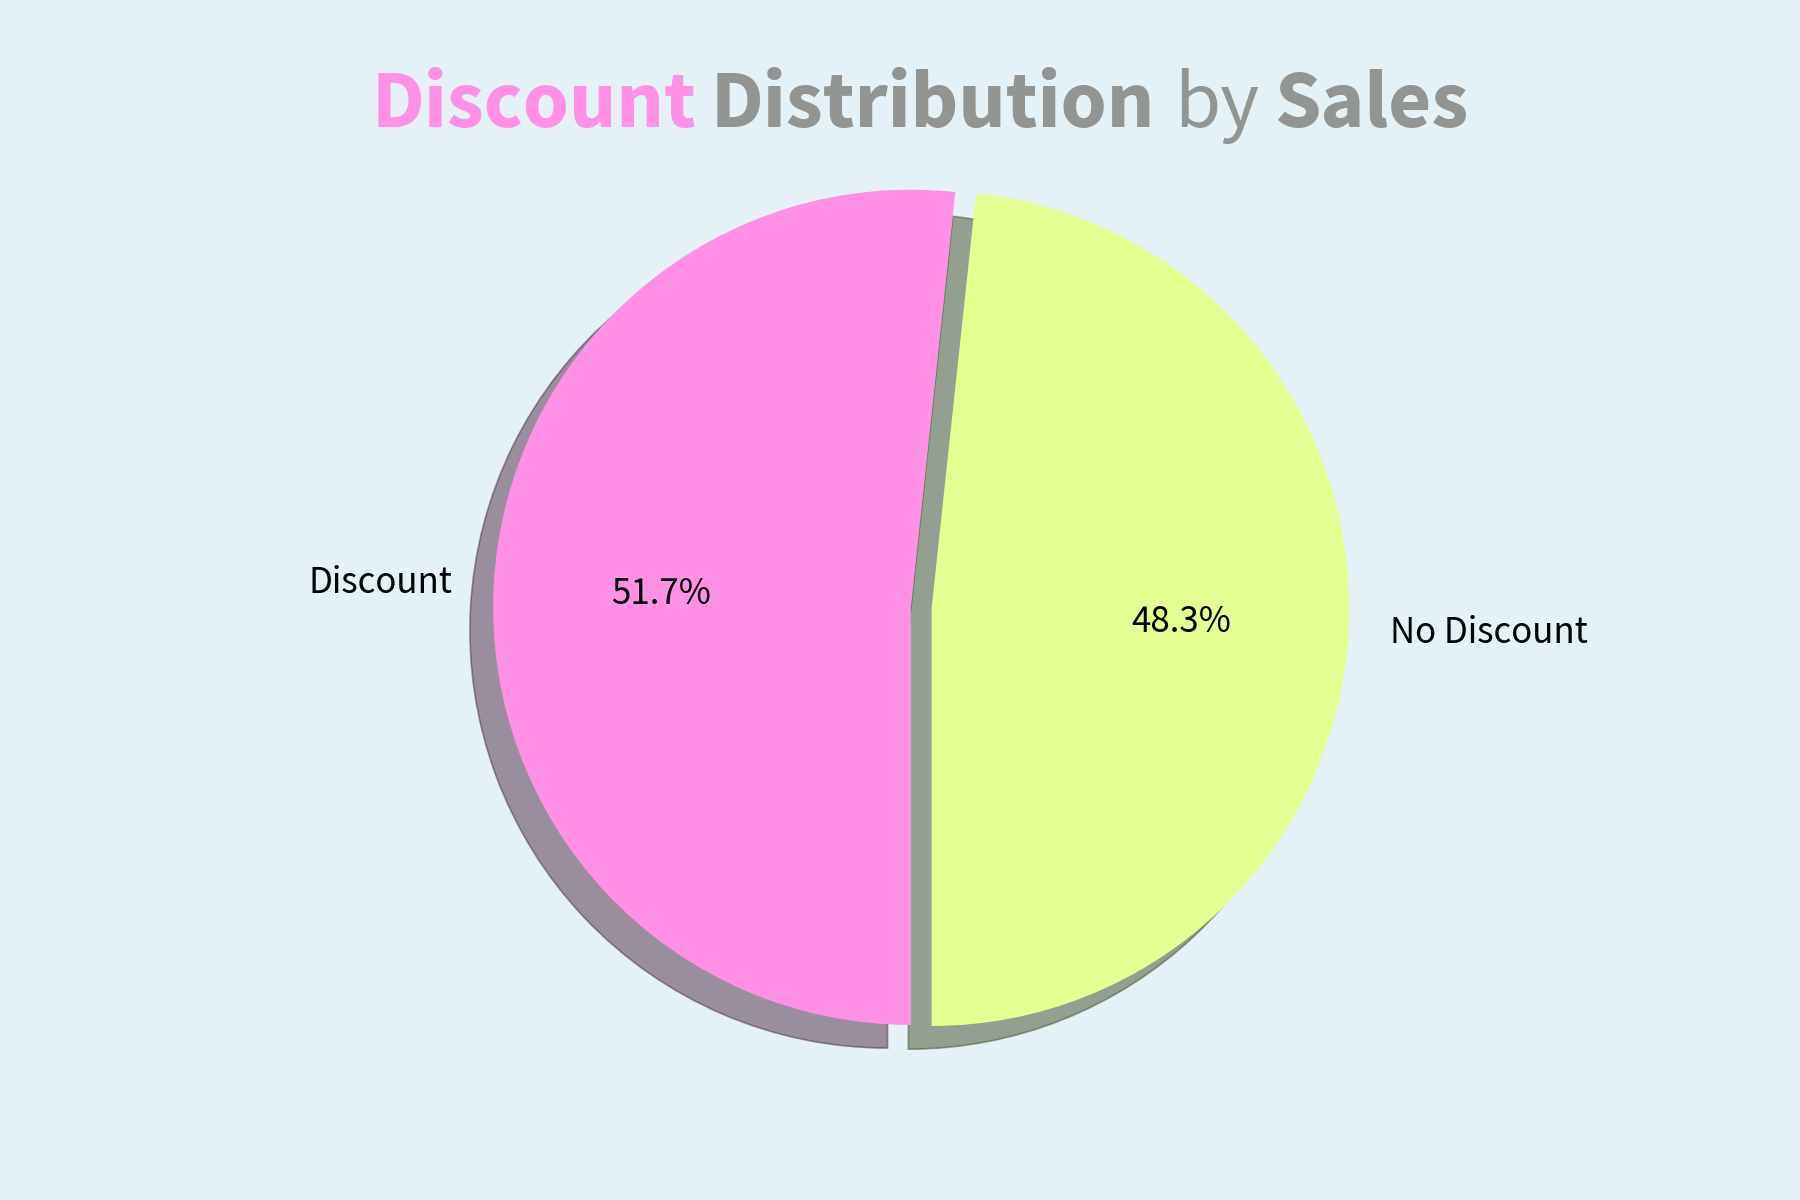

In [32]:
fig = plt.figure(figsize =(9, 6))
fig.patch.set_facecolor('#e4f2f7')
mpl.rcParams['font.size'] = 14
mpl.rcParams['font.family'] = 'Source Sans Pro'
plt.pie(discount['Sales'],
        labels=['No Discount', 'Discount'],
        explode=(0.05, 0),
        colors= ['#e4ff90', '#ff90e4'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=270)

plt.axis('equal')
plt.text(-1.29, 1.15, "Discount", size=30, color="#ff90e4", fontweight="bold")
plt.text(-0.48, 1.15, "Distribution", size=30, color="grey", fontweight="bold")
plt.text(0.63, 1.15, "by", size=30, color="grey")
plt.text(0.87, 1.15, "Sales", size=30, color="grey", fontweight="bold")

plt.show()